# GTFSUtils Quickstart

## Table of Contents

- Download Vienna GTFS
- Show gtfsutils Help
- Show Information about GTFS File
- Load GTFS File
- Visualize Routes
- Visualize Shapes
- Filter by Geometry (Within)
- Filter by Geometry (Intersects)
- Filter by Agency
- Save Filtered GTFS File

# Download Vienna GTFS

- Open Data Austria - [Wiener Linien – Fahrplandaten GTFS Wien](https://www.data.gv.at/katalog/dataset/ab4a73b6-1c2d-42e1-b4d9-049e04889cf0)

In [1]:
%%bash
mkdir -p data
if [ ! -f "data/vienna.gtfs.zip" ]; then
  wget http://www.wienerlinien.at/ogd_realtime/doku/ogd/gtfs/gtfs.zip \
    -qO data/vienna.gtfs.zip
fi

# Show gtfsutils Help

In [2]:
%%bash
gtfsutils --help

usage: gtfsutils [-h] [-i SRC] [-o DST] [--bounds BOUNDS] [-f OPERATION]
                 [--overwrite] [-v]
                 method

GTFS Utilities

positional arguments:
  method                GTFS method: filter, bounds, info, merge

optional arguments:
  -h, --help            show this help message and exit
  -i SRC, --input SRC   Input filepath
  -o DST, --output DST  Output filepath
  --bounds BOUNDS       Filter boundary
  -f OPERATION, --filter-operation OPERATION
                        Filter operation (within, intersects)
  --overwrite           Overwrite if exists
  -v, --verbose         Verbose output


# Show Information about GTFS File

In [3]:
%%bash
gtfsutils info \
  --input data/vienna.gtfs.zip


GTFS files:
  agency.txt                      2 rows
  calendar.txt                  247 rows
  calendar_dates.txt         11,431 rows
  routes.txt                    613 rows
  shapes.txt                476,277 rows
  stop_times.txt          4,947,449 rows
  stops.txt                   4,496 rows
  trips.txt                 268,377 rows

Calender date range:
  13.12.2020 - 11.12.2021

Bounding box:
  [16.1977025532707, 47.9995020902886, 16.5494019702052, 48.3011051975429]



# Load GTFS File

In [4]:
import shapely.geometry
import geopandas as gpd
import matplotlib.pyplot as plt

import gtfsutils
import gtfsutils.filter
import gtfsutils.routes

print(f"gtfsutils {gtfsutils.__version__}")

gtfsutils 0.0.4


In [5]:
%%time
bounds = [16.398134, 48.1352198, 16.5775132, 48.2935324]
gdf_bounds = gpd.GeoSeries(
    shapely.geometry.box(*bounds),
    crs='EPSG:4326').boundary

filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 6.12 s, sys: 725 ms, total: 6.85 s
Wall time: 6.95 s


In [6]:
# Show available dataframes
df_dict.keys()

dict_keys(['stops', 'stop_times', 'shapes', 'calendar_dates', 'calendar', 'trips', 'routes', 'agency'])

In [7]:
gtfsutils.print_info(df_dict)


GTFS files:
  agency.txt                      2 rows
  calendar.txt                  247 rows
  calendar_dates.txt         11,431 rows
  routes.txt                    613 rows
  shapes.txt                476,277 rows
  stop_times.txt          4,947,449 rows
  stops.txt                   4,496 rows
  trips.txt                 268,377 rows

Calender date range:
  13.12.2020 - 11.12.2021

Bounding box:
  [16.1977025532707, 47.9995020902886, 16.5494019702052, 48.3011051975429]



# Visualize Routes

In [8]:
%%time
gdf_routes = gtfsutils.routes.load_routes_counts(df_dict)

CPU times: user 1.46 s, sys: 4.94 ms, total: 1.46 s
Wall time: 1.47 s


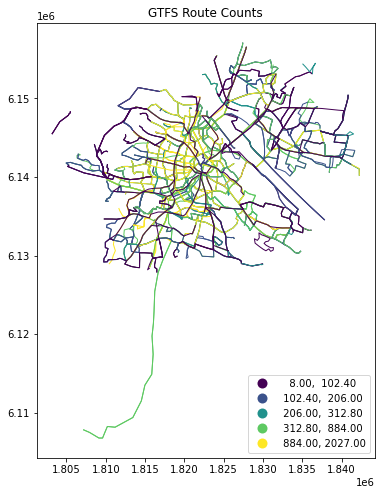

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))

gdf_plot = gdf_routes.to_crs(epsg=3857)
gdf_plot.plot(
    ax=ax, linewidth=1, alpha=1, 
    column='counts', cmap='viridis', scheme='quantiles', 
    legend=True, legend_kwds={'loc': 'lower right'})
ax.set_title("GTFS Route Counts");

# Visualize Shapes

In [10]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 3.67 s, sys: 21.6 ms, total: 3.69 s
Wall time: 3.86 s


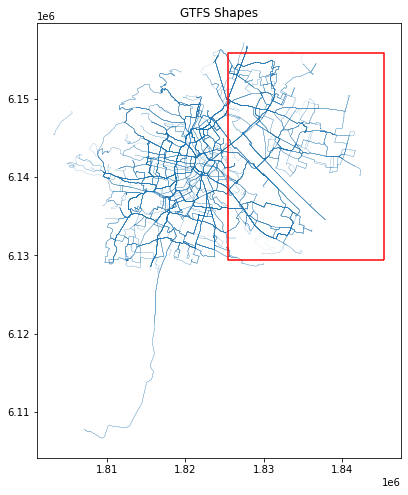

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS Shapes");

# Filter by Geometry (Within)

In [12]:
%%time
gtfsutils.filter.filter_by_geometry(
    df_dict, bounds, operation='within')

CPU times: user 4.08 s, sys: 40.5 ms, total: 4.12 s
Wall time: 4.24 s


In [13]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 764 ms, sys: 4.23 ms, total: 768 ms
Wall time: 768 ms


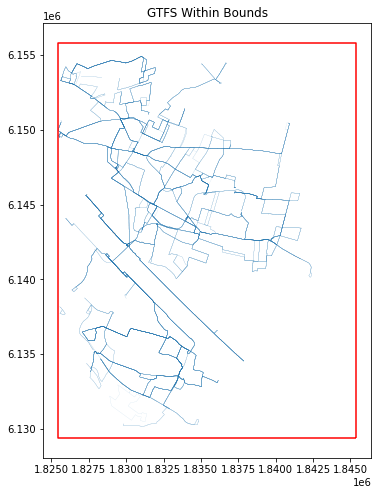

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS Within Bounds");

# Filter by Geometry (Intersects)

In [15]:
%%time
filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 6.26 s, sys: 607 ms, total: 6.87 s
Wall time: 6.9 s


In [16]:
%%time
gtfsutils.filter.filter_by_geometry(
    df_dict, bounds, operation='intersects')

CPU times: user 4.48 s, sys: 61.2 ms, total: 4.54 s
Wall time: 4.6 s


In [17]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 1.76 s, sys: 893 µs, total: 1.76 s
Wall time: 1.76 s


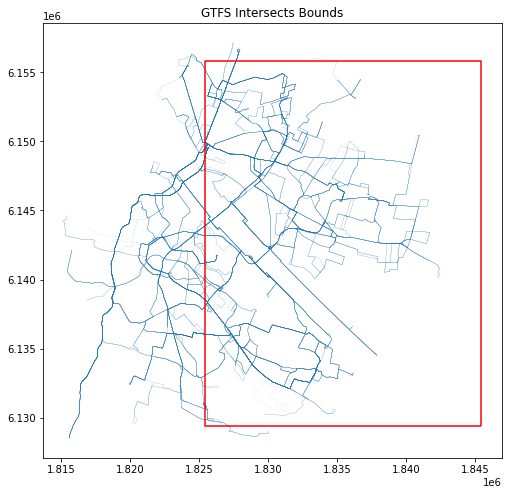

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
gdf_bounds.to_crs(epsg=3857).plot(ax=ax, color='r')
ax.set_title("GTFS Intersects Bounds");

# Filter by Agency

In [19]:
%%time
filepath = "data/vienna.gtfs.zip"
df_dict = gtfsutils.load_gtfs(filepath)

CPU times: user 6.34 s, sys: 640 ms, total: 6.98 s
Wall time: 7.21 s


In [20]:
df_dict['agency']

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,3,WLB,https://www.wlb.at/,Europe/Vienna,DE,+43 (0) 1/ 90 444
1,4,Wiener Linien,https://www.wienerlinien.at/,Europe/Vienna,DE,+43 (0)1 7909 - 0


In [21]:
%%time
gtfsutils.filter.filter_by_agency_ids(df_dict, [4])

CPU times: user 717 ms, sys: 116 ms, total: 833 ms
Wall time: 832 ms


In [22]:
%%time
gdf = gtfsutils.load_shapes(df_dict)

CPU times: user 3.75 s, sys: 7.6 ms, total: 3.76 s
Wall time: 3.8 s


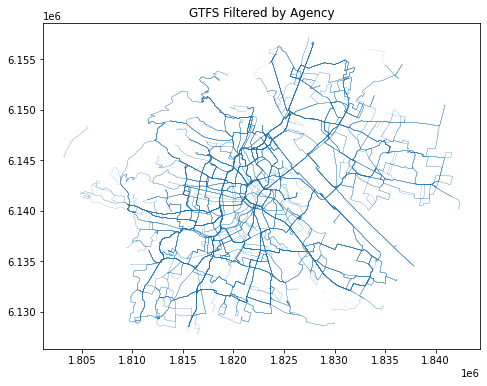

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))

gdf.to_crs(epsg=3857).plot(ax=ax, linewidth=0.1, alpha=0.5)
ax.set_title("GTFS Filtered by Agency");

# Save Filtered GTFS File

In [24]:
%%time
filepath = "data/vienna-filtered.gtfs.zip"
gtfsutils.save_gtfs(df_dict, filepath, ignore_required=True, overwrite=True)

CPU times: user 19.8 s, sys: 1.07 s, total: 20.9 s
Wall time: 47.2 s
